## Tech Challenge

🧠 Você deverá:  
⦁	Reunir e tratar dados reais do site da Embrapa.  
⦁	Criar gráficos atrativos para investidores e acionistas.  
⦁	Apontar prospeções futuras e ações que ajudem a melhorar as exportações.  
⦁	Entregar um projeto visual e claro para tomada de decisão.  

🎯 Objetivo principal:  
Desenvolver relatórios e análises de dados que mostrem:  
⦁	A quantidade de vinho exportado nos últimos 14 anos.  
⦁	Informações por país de destino.  
⦁	Fatores externos que influenciam essas exportações:  
----⦁	🌦️ Dados climáticos  
----⦁	👥 Dados demográficos  
----⦁	💰 Dados econômicos   

#### 📈 1. **Análise geral**

1.1 - 5 países que mais importaram vinho do Brasil nos últimos 14 anos

1.2 - Volume em litros importado pelos 5 maiores importadores ao longo dos últimos 14 anos  

1.3 - Países que pagam mais caro pelo vinho   

1.4 - Distribuição da quantidade de vinho por ano

1.5 - Importação geral ao longo dos últimos 14 anos   

1.6 - Distribuição do valor de vinho por ano

1.7 - Valor total das exportações ao longo dos últimos 14 anos

#### 🌍 **2. Correlações com Indicadores Macroeconômicos**

2.1 - Importação x PIB das maiores economias e importadores

2.2 - Dispersão: PIB x Importação

2.3 - Como a variação do PIB afeta o volume importado ao longo do tempo?

2.4 - Dispersão: População x Importação

### ☀️ **3. Relação com o Clima**

3.1 - Importação por clima

3.2 - Dispersão: Temperatura média x Importação

Existe correlação entre aumento da temperatura e variação no consumo?

Análise por hemisfério: há diferenças entre países do hemisfério norte e sul no comportamento das importações?

📊 4. Classificação e Agrupamentos
Clusterização de países: com base em PIB, clima e demografia, agrupar países semelhantes e ver como cada grupo consome vinho brasileiro.

Segmentação de mercado: identificar tipos de mercados para estratégias de marketing/exportação.

💹 5. Elasticidade e Influência Econômica
Elasticidade-renda da demanda:

Quanto o consumo de vinho brasileiro aumenta à medida que o PIB do país cresce?

Impacto de crises econômicas:

Quedas bruscas nas exportações em anos de crise econômica global/local?

### 🧭 **6. Comparativo por Continente/Região**

6.1 - Qual região consome mais vinho brasileiro?

6.2 - Como o comportamento de regiões como Europa, América do Norte, Ásia etc. varia ao longo do tempo?

📍 7. Análise de Dependência
O Brasil depende de poucos ou muitos países para sua exportação de vinho?

Como isso mudou nos últimos 14 anos?

📌 8. Previsões e Modelos
Modelos preditivos:

Usar séries temporais (ARIMA, Prophet, etc.) para prever exportações nos próximos anos.

Incluir variáveis econômicas e climáticas nos modelos para melhorar a previsão.

Cenários futuros:

E se o PIB de um país aumentar X%? Como isso impactaria as exportações?

**Obs:** A maioria das bases externas ainda não disponibilizaram os dados de 2024. Portanto essa análise se concentra no período de 2010 a 2023

In [442]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Lendo as bases de dados

In [443]:
df_vinhos = pd.read_csv('ExportacaoVinhos.csv', encoding='utf-8', sep=',')

In [444]:
# https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?downloadformat=csv
df_PIBs = pd.read_csv('PIBs.csv', encoding='utf-8', decimal='.')

In [445]:
# https://data.worldbank.org/indicator/SP.POP.TOTL?downloadformat=csv
df_dados_demograficos = pd.read_csv('DadosDemograficos.csv', encoding='utf-8')

In [446]:
# https://berkeleyearth.org/data/
df_dados_climaticos = pd.read_csv('DadosClimaticos.csv')

## 1. Análise geral por ano

In [447]:
volume_por_ano = df_vinhos.groupby('ANO')['QUANTIDADE'].sum() / 1_000_000

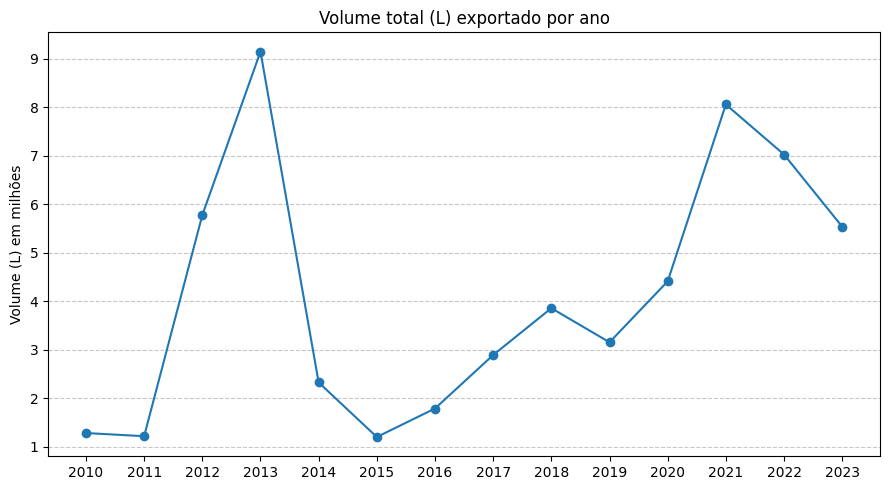

In [448]:
plt.figure(figsize=(9, 5))
volume_por_ano.plot(marker='o')

ax = plt.gca()
ax.set_xticks(sorted(df_vinhos['ANO'].unique()))

plt.title('Volume total (L) exportado por ano')
plt.xlabel(None)
plt.ylabel('Volume (L) em milhões')
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

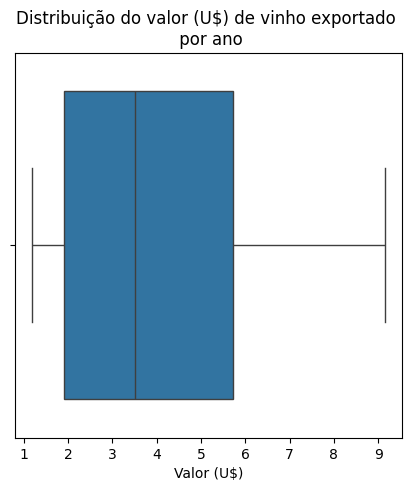

In [449]:
plt.figure(figsize=(5,5))
sns.boxplot(x=volume_por_ano)
plt.title('Distribuição do valor (U$) de vinho exportado \n por ano')
plt.xlabel('Valor (U$)')
plt.show()

In [450]:
valor_por_ano = df_vinhos.groupby('ANO')['VALOR'].sum() / 1_000_000

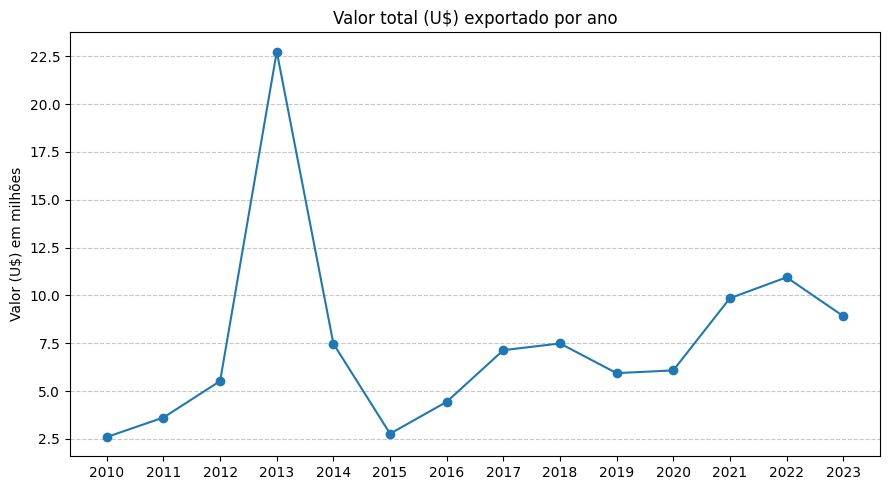

In [451]:
plt.figure(figsize=(9, 5))
valor_por_ano.plot(marker='o')

ax = plt.gca()
ax.set_xticks(sorted(df_vinhos['ANO'].unique()))

plt.title('Valor total (U$) exportado por ano')
plt.xlabel(None)
plt.ylabel('Valor (U$) em milhões')
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

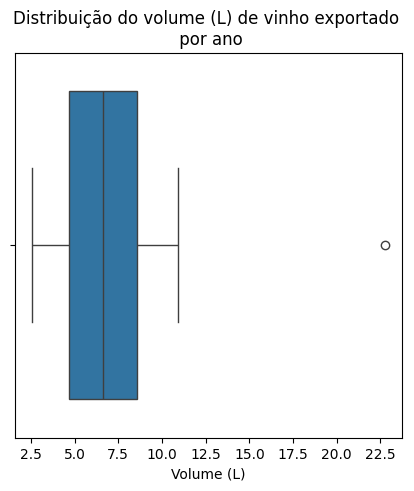

In [452]:
plt.figure(figsize=(5,5))
sns.boxplot(x=valor_por_ano)
plt.title('Distribuição do volume (L) de vinho exportado \n por ano')
plt.xlabel('Volume (L)')
plt.show()

In [453]:
# Calcula o primeiro e o terceiro quartil
Q1 = valor_por_ano.quantile(0.25)
Q3 = valor_por_ano.quantile(0.75)

# Calcula o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Define limites inferior e superior
limite_inferior = Q1 - (1.5 * IQR)
limite_superior = Q3 + (1.5 * IQR)

# Identifica os outliers
outliers = valor_por_ano[(valor_por_ano < limite_inferior) | (valor_por_ano > limite_superior)]

outliers

ANO
2013    22.744845
Name: VALOR, dtype: float64

In [454]:
df_merged = pd.DataFrame({'QUANTIDADE': volume_por_ano, 'VALOR': valor_por_ano, 'ANO': volume_por_ano.index})

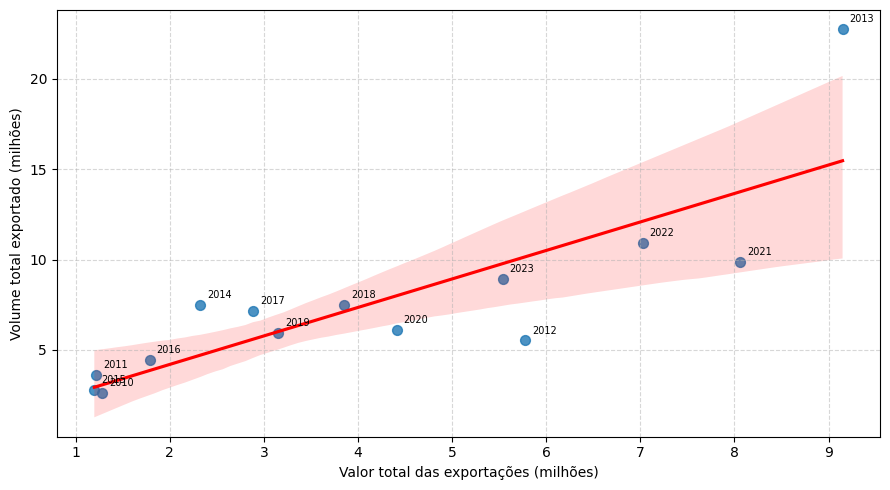

In [455]:
plt.figure(figsize=(9, 5))
sns.regplot(data=df_merged, x='QUANTIDADE', y='VALOR', scatter_kws={'s': 50}, line_kws={'color': 'red'})

for i in range(len(df_merged)):
    plt.annotate(df_merged['ANO'].iloc[i],
                 (df_merged['QUANTIDADE'].iloc[i], df_merged['VALOR'].iloc[i]),
                 textcoords="offset points", xytext=(5,5), ha='left', fontsize=7)

plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('Valor total das exportações (milhões)')
plt.ylabel('Volume total exportado (milhões)')
plt.tight_layout()
plt.show()

## 2. Análise geral por maiores importadores

In [456]:
volume_por_pais = df_vinhos.groupby('PAIS')['QUANTIDADE'].sum().sort_values(ascending=False)

In [457]:
# Calcula o primeiro e o terceiro quartil
Q1 = volume_por_pais.quantile(0.25)
Q3 = volume_por_pais.quantile(0.75)

# Calcula o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Define limites inferior e superior
limite_superior = Q3 + (1.5 * IQR)

# Identifica os outliers
maiores_importadores = volume_por_pais[volume_por_pais > limite_superior]

print(f'Limite superior: {limite_superior}\n')

print(f'Países que importam acima do limite superior \n{maiores_importadores}')

Limite superior: 178544.375

Países que importam acima do limite superior 
PAIS
Paraguai                   30316320
Rússia                     10909227
Estados Unidos              2976980
Haiti                       2346728
Espanha                     1988057
Reino Unido                 1120688
Uruguai                     1118688
China                       1021270
Japão                        754367
Holanda (Países Baixos)      726332
Alemanha                     423029
França                       308740
Bélgica                      273277
Cuba                         271044
Portugal                     243238
Curaçao                      216254
Venezuela                    196545
Bolívia                      181905
Name: QUANTIDADE, dtype: int64


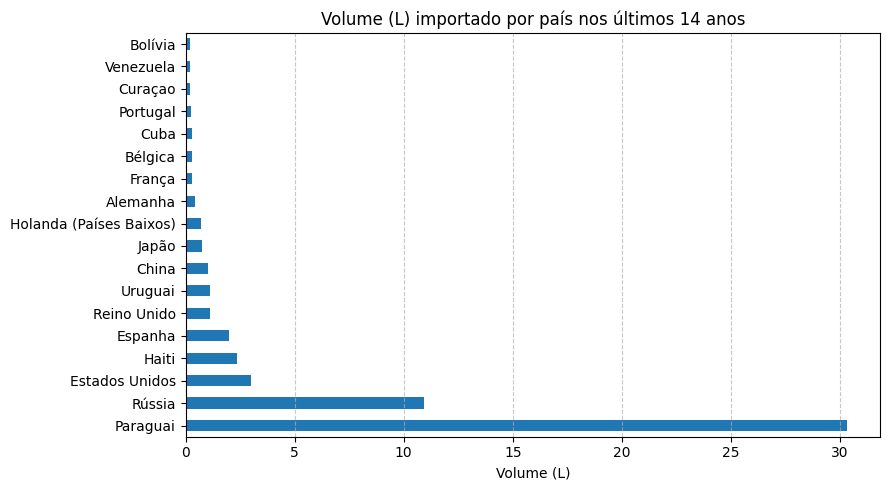

In [458]:
plt.figure(figsize=(9, 5))
(maiores_importadores / 1_000_000).plot(kind='barh')

plt.title('Volume (L) importado por país nos últimos 14 anos')
plt.xlabel('Volume (L)')
plt.ylabel(None)
plt.grid(linestyle='--', alpha=0.7)
plt.grid(False, axis='y')
plt.tight_layout()
plt.show()

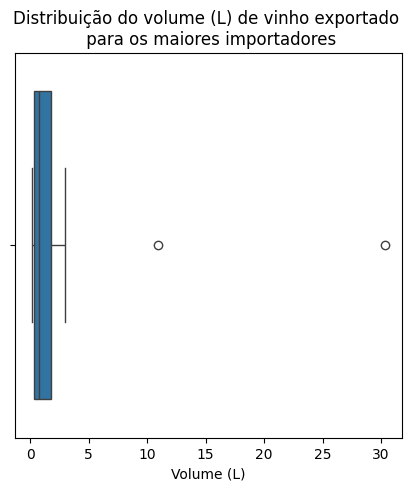

In [459]:
plt.figure(figsize=(5,5))
sns.boxplot(x=maiores_importadores / 1_000_000)
plt.title('Distribuição do volume (L) de vinho exportado \n para os maiores importadores')
plt.xlabel('Volume (L)')
plt.show()

In [460]:
pctg_maiores_importadores = ((maiores_importadores * 100) / maiores_importadores.sum()).round(1)

In [461]:
pctg_maiores_importadores

PAIS
Paraguai                   54.7
Rússia                     19.7
Estados Unidos              5.4
Haiti                       4.2
Espanha                     3.6
Reino Unido                 2.0
Uruguai                     2.0
China                       1.8
Japão                       1.4
Holanda (Países Baixos)     1.3
Alemanha                    0.8
França                      0.6
Bélgica                     0.5
Cuba                        0.5
Portugal                    0.4
Curaçao                     0.4
Venezuela                   0.4
Bolívia                     0.3
Name: QUANTIDADE, dtype: float64

## 3. Análise dos valores por litro

In [462]:
soma_valor = df_vinhos.groupby('PAIS')['VALOR'].sum()
soma_qtd = df_vinhos.groupby('PAIS')['QUANTIDADE'].sum()
valor_por_litro = soma_valor / soma_qtd

In [463]:
# Em 2020 Camarões importou 0 litros e pagou U$178, 
# a divisão desses valores para calcular o valor 
# por litro gera uma linha com valor infinito.
# Substituiremos infinito por 0
valor_por_litro.replace(np.inf, 0, inplace=True)

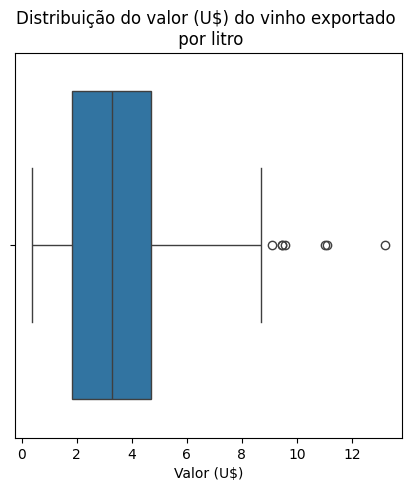

In [464]:
plt.figure(figsize=(5,5))
sns.boxplot(x=valor_por_litro)
plt.title('Distribuição do valor (U$) do vinho exportado \n por litro')
plt.xlabel('Valor (U$)')
plt.show()

In [465]:
# Calcula o primeiro e o terceiro quartil
Q1 = valor_por_litro.quantile(0.25)
Q3 = valor_por_litro.quantile(0.75)

# Calcula o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Define limites inferior e superior
limite_superior = Q3 + (1.5 * IQR)

# Identifica os outliers
valor_por_litro_paises_que_pagam_mais_caro = valor_por_litro[valor_por_litro > limite_superior]

print(f'Limite superior: {limite_superior}\n')

print(f'Países que pagam acima do limite superior \n{valor_por_litro_paises_que_pagam_mais_caro.round(2)}')

Limite superior: 9.05631028107187

Países que pagam acima do limite superior 
PAIS
Bangladesh                11.08
Bermudas                   9.56
Bulgária                  13.20
Croácia                   11.04
Emirados Árabes Unidos     9.08
Letônia                    9.45
Mauritânia                 9.44
dtype: float64


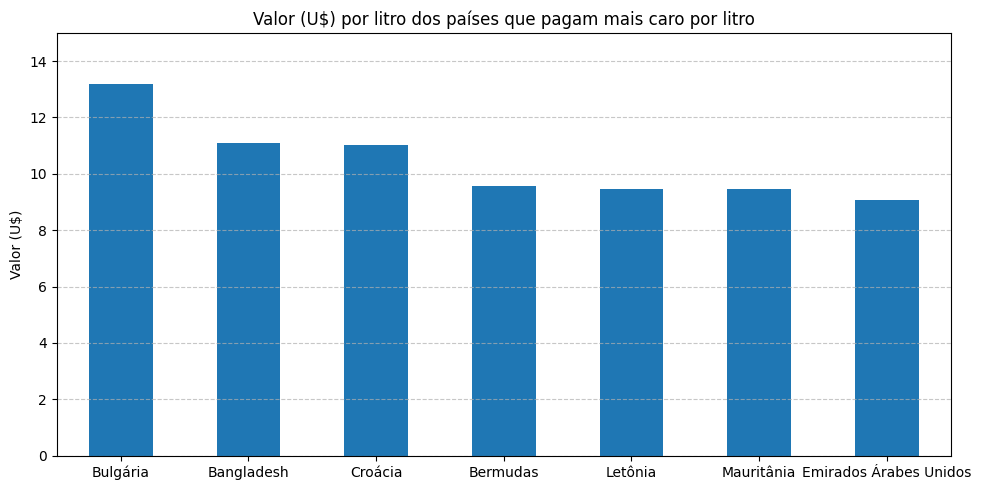

In [466]:
plt.figure(figsize=(10, 5))
(valor_por_litro_paises_que_pagam_mais_caro.sort_values(ascending=False)).plot(kind='bar')

plt.title('Valor (U$) por litro dos países que pagam mais caro por litro')
plt.xlabel(None)
plt.ylabel('Valor (U$)')
plt.xticks(rotation=360)
plt.grid(linestyle='--', alpha=0.7)
plt.grid(False, axis='x')
plt.ylim(0, 15)
plt.tight_layout()
plt.show()


In [467]:
df_paises_que_pagam_mais_caro_por_litro = df_vinhos[df_vinhos['PAIS'].isin(valor_por_litro_paises_que_pagam_mais_caro.index)]

In [468]:
volume_por_paises_que_pagam_mais_caro_por_litro = df_paises_que_pagam_mais_caro_por_litro.groupby('PAIS')['QUANTIDADE'].sum().sort_values(ascending=False)

In [469]:
volume_por_paises_que_pagam_mais_caro_por_litro

PAIS
Emirados Árabes Unidos    14894
Letônia                     395
Bulgária                    122
Croácia                      55
Bermudas                     16
Bangladesh                   12
Mauritânia                    9
Name: QUANTIDADE, dtype: int64

Países que pagam mais caro dentre os maiores importadores

In [470]:
valor_por_litro_maiores_importadores = valor_por_litro[valor_por_litro.index.isin(maiores_importadores.index)]

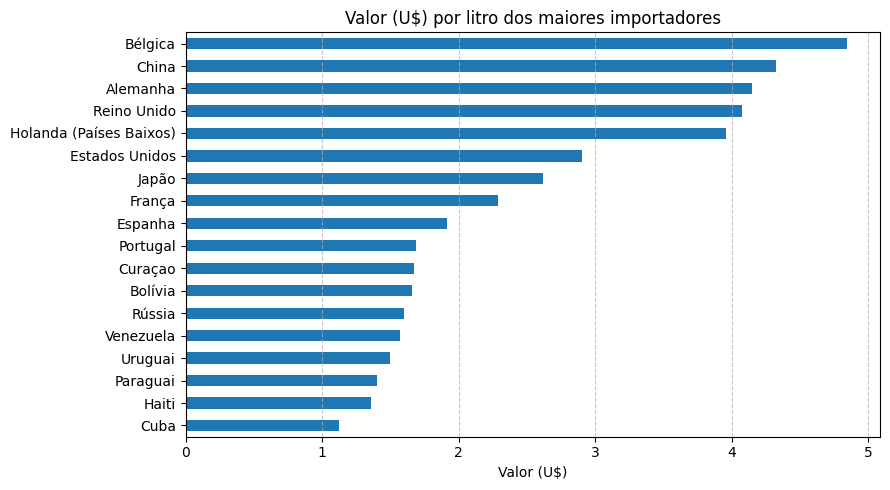

In [471]:
plt.figure(figsize=(9, 5))
(valor_por_litro_maiores_importadores.sort_values()).plot(kind='barh')

plt.title('Valor (U$) por litro dos maiores importadores')
plt.xlabel('Valor (U$)')
plt.ylabel(None)
plt.grid(linestyle='--', alpha=0.7)
plt.grid(False, axis='y')
plt.tight_layout()
plt.show()

## 4. Correlações com indicadores macroeconômicos

In [472]:
df_PIBs = pd.melt(
    df_PIBs, 
    id_vars=['PAIS', 'COD_PAIS'], 
    var_name='ANO', 
    value_name='PIB'
)

# Removendo o prefixo 'ANO_' e transformando em inteiro
df_PIBs['ANO'] = df_PIBs['ANO'].str.replace('ANO_', '').astype(int)

In [473]:
df_dados_demograficos = pd.melt(
    df_dados_demograficos, 
    id_vars=['PAIS', 'COD_PAIS'], 
    var_name='ANO', 
    value_name='POPULACAO'
)

# Removendo o prefixo 'ANO_' e transformando em inteiro
df_dados_demograficos['ANO'] = df_dados_demograficos['ANO'].str.replace('ANO_', '').astype(int)

In [474]:
df_merged = df_vinhos.merge(df_PIBs[['COD_PAIS', 'ANO', 'PIB']], on=['COD_PAIS', 'ANO'])
df_merged = df_merged.merge(df_dados_demograficos[['COD_PAIS', 'ANO', 'POPULACAO']], on=['COD_PAIS', 'ANO'])

In [475]:
df_merged

,PAIS,QUANTIDADE,VALOR,ANO,CONTINENTE,COD_PAIS,PIB,POPULACAO
0,Alemanha,27715,138666,2010,Europa,DEU,3.468154e+12,81776930.0
1,Angola,33557,189891,2010,África,AGO,8.379947e+10,23294825.0
2,Austrália,1823,17960,2010,Oceania,AUS,1.148838e+12,22031750.0
3,Bahamas,3175,12759,2010,América Central,BHS,1.009576e+10,367478.0
4,Bélgica,42532,185411,2010,Europa,BEL,4.815565e+11,10895586.0
...,...,...,...,...,...,...,...,...
666,Togo,14550,25235,2023,África,TGO,9.171262e+09,9304337.0
667,Turquia,28104,95421,2023,Ásia,TUR,1.118253e+12,85325965.0
668,Uruguai,326093,454271,2023,América do Sul,URY,7.724083e+10,3388081.0
669,Venezuela,141030,220512,2023,América do Sul,VEN,NaN,28300854.0


In [476]:
maiores_economias = df_merged.groupby('PAIS')['PIB'].mean().sort_values(ascending=False)

In [477]:
maiores_densidades_demograficas = df_merged.groupby('PAIS')['POPULACAO'].mean().sort_values(ascending=False)

In [478]:
# Calcula o primeiro e o terceiro quartil
Q1 = maiores_economias.quantile(0.25)
Q3 = maiores_economias.quantile(0.75)

# Calcula o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Define limites inferior e superior
limite_superior = Q3 + (1.5 * IQR)

# Identifica os outliers
maiores_economias = maiores_economias[maiores_economias > limite_superior]

print(f'Limite superior: {limite_superior}\n')

print(f'Maiores economias \n{maiores_economias}')

Limite superior: 1072984123071.5833

Maiores economias 
PAIS
Estados Unidos    1.993306e+13
China             1.237015e+13
Japão             5.104524e+12
Alemanha          3.884012e+12
Índia             3.119750e+12
Reino Unido       2.861489e+12
França            2.728860e+12
Itália            2.103371e+12
Rússia            1.932284e+12
Brasil            1.811286e+12
Canadá            1.803383e+12
Coreia do Sul     1.675133e+12
Austrália         1.439192e+12
Espanha           1.432462e+12
México            1.337301e+12
Indonésia         1.215113e+12
Name: PIB, dtype: float64


In [479]:
# Calcula o primeiro e o terceiro quartil
Q1 = maiores_densidades_demograficas.quantile(0.25)
Q3 = maiores_densidades_demograficas.quantile(0.75)

# Calcula o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Define limites inferior e superior
limite_superior = Q3 + (1.5 * IQR)

# Identifica os outliers
maiores_densidades_demograficas = maiores_densidades_demograficas[maiores_densidades_demograficas > limite_superior]

print(f'Limite superior: {limite_superior}\n')

print(f'Maiores densidades demográficas \n{maiores_densidades_demograficas}')

Limite superior: 81197402.5

Maiores densidades demográficas 
PAIS
Índia             1.413869e+09
China             1.385196e+09
Estados Unidos    3.232213e+08
Indonésia         2.780025e+08
Brasil            2.099284e+08
Nigéria           2.029570e+08
Bangladesh        1.677806e+08
Rússia            1.443273e+08
Japão             1.267479e+08
México            1.246183e+08
Filipinas         1.123846e+08
Vietnã            9.654819e+07
Irã               8.856773e+07
Turquia           8.368797e+07
Alemanha          8.215941e+07
Name: POPULACAO, dtype: float64


In [480]:
maiores_importadores_economicamente = list(set(maiores_economias.index) & set(maiores_importadores.index))
print(f'{len(maiores_importadores_economicamente)} das maiores economias estão entre os {len(maiores_importadores)} maiores importadores')
for pais in maiores_importadores_economicamente:
    print(pais)

8 das maiores economias estão entre os 18 maiores importadores
China
Japão
Alemanha
Reino Unido
França
Espanha
Estados Unidos
Rússia


In [481]:
maiores_importadores_demograficamente = list(set(maiores_densidades_demograficas.index) & set(maiores_densidades_demograficas.index))
print(f'{len(maiores_importadores_demograficamente)} dos países mais densos estão entre os {len(maiores_importadores)} maiores importadores')
for pais in maiores_importadores_demograficamente:
    print(pais)

15 dos países mais densos estão entre os 18 maiores importadores
Filipinas
Turquia
China
Japão
Alemanha
Brasil
Bangladesh
Irã
Vietnã
México
Nigéria
Índia
Indonésia
Estados Unidos
Rússia


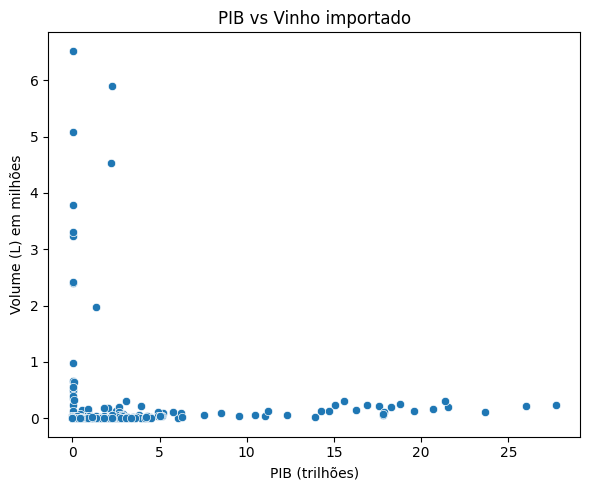

In [482]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_merged[df_merged['PAIS'].isin(maiores_importadores_economicamente)], x=df_merged['PIB'] / 1_000_000_000_000, y=df_merged['QUANTIDADE'] / 1_000_000)
plt.xlabel('PIB (trilhões)')
plt.ylabel('Volume (L) em milhões')
plt.title('PIB vs Vinho importado')
plt.tight_layout()
plt.show()

Com base na análise econômica realizada ao longo dos últimos 14 anos, constatou-se que o Produto Interno Bruto (PIB) dos países não exerce influência estatisticamente significativa sobre o volume de vinho importado. Isso indica que economias com maior PIB não importam, necessariamente, quantidades mais elevadas da bebida.

In [483]:
media_economia_anual = df_merged.groupby('ANO')['PIB'].sum()
soma_importacao_anual = df_merged.groupby('ANO')['QUANTIDADE'].sum()

In [484]:
df_importacao_economia_anual = pd.DataFrame({'PIB': media_economia_anual, 'QTD_IMPORTADA': soma_importacao_anual})
df_importacao_economia_anual

,PIB,QTD_IMPORTADA
ANO,,
2010,4.330947e+13,1270764
2011,5.089793e+13,1202999
2012,5.505086e+13,5766129
2013,5.720491e+13,9137778
2014,5.924725e+13,2307055
2015,5.233530e+13,1184619
2016,5.546459e+13,1752941
2017,5.586451e+13,2869184
2018,6.877372e+13,3848573


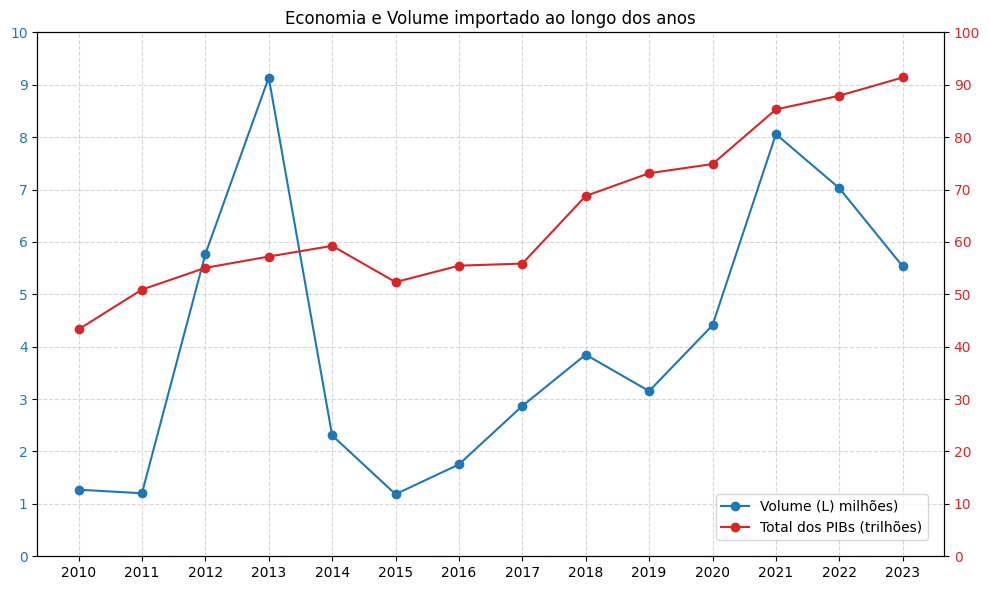

In [485]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(df_importacao_economia_anual.index, 
         df_importacao_economia_anual['QTD_IMPORTADA'] / 1_000_000, 
         label='Volume (L) milhões)', color='tab:blue', marker='o')
ax1.set_xlabel(None)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax1.set_ylim(0, 10)
ax1.set_yticks(range(0, 11, 1))

ax2 = ax1.twinx()
ax2.plot(df_importacao_economia_anual.index, 
         df_importacao_economia_anual['PIB'] / 1_000_000_000_000, 
         label='Total dos PIBs (trilhões)', color='tab:red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax2.set_ylim(0, 100)
ax2.set_yticks(range(0, 101, 10))

plt.title('Economia e Volume importado ao longo dos anos')
plt.xticks(sorted(df_importacao_economia_anual.index), rotation=360)
ax1.grid(True, axis='both', linestyle='--', alpha=0.5)
fig.legend(loc='lower right', bbox_to_anchor=(0.94, 0.08))
fig.tight_layout()
plt.show()

## 5. Relação com o Clima

In [486]:
temp_media_paises = df_dados_climaticos.groupby('COD_PAIS')['TEMPERATURA_MEDIA'].mean().round(1)

In [487]:
temp_media_paises = df_dados_climaticos.groupby('COD_PAIS')['TEMPERATURA_MEDIA'].mean().round(1)

In [488]:
df_temp_media_paises = temp_media_paises.to_frame().reset_index()

In [489]:
condicoes = [
    df_temp_media_paises['TEMPERATURA_MEDIA'] < 0, # Muito Frio
    df_temp_media_paises['TEMPERATURA_MEDIA'] < 10, # Frio
    df_temp_media_paises['TEMPERATURA_MEDIA'] < 19, # Temperado
    df_temp_media_paises['TEMPERATURA_MEDIA'] < 26, # Quente
    df_temp_media_paises['TEMPERATURA_MEDIA'] >= 26 # Muito Quente
]

climas = ['Muito Frio', 'Frio', 'Temperado', 'Quente', 'Muito Quente']

df_temp_media_paises['CLIMA'] = np.select(condicoes, climas, default='Não classificado')

Calculando o total de vinho importado por clima

In [490]:
df_cruzado = df_merged.merge(df_temp_media_paises[['TEMPERATURA_MEDIA', 'CLIMA', 'COD_PAIS']], on='COD_PAIS', how='inner')

df_total_por_clima = df_cruzado.groupby('CLIMA')['QUANTIDADE'].sum().reset_index()

df_total_por_clima['PORCENTAGEM'] = (df_total_por_clima['QUANTIDADE'] * 100) / df_total_por_clima['QUANTIDADE'].sum()

df_total_por_clima.sort_values(by='QUANTIDADE', ascending=False, inplace=True)

df_total_por_clima.set_index('CLIMA', inplace=True)

df_total_por_clima['QTD_PAISES_CLIMA'] = df_temp_media_paises.groupby('CLIMA')['COD_PAIS'].count()

df_total_por_clima['PROPORCAO_POR_CLIMA'] = (df_total_por_clima['QUANTIDADE'] / df_total_por_clima['QTD_PAISES_CLIMA']).round(2)

In [491]:
df_total_por_clima

,QUANTIDADE,PORCENTAGEM,QTD_PAISES_CLIMA,PROPORCAO_POR_CLIMA
CLIMA,,,,
Quente,31017445,54.166893,29,1069567.07
Muito Frio,11079644,19.348786,2,5539822.00
Frio,6047491,10.560954,15,403166.07
Temperado,5635170,9.840902,23,245007.39
Muito Quente,3482986,6.082465,41,84950.88


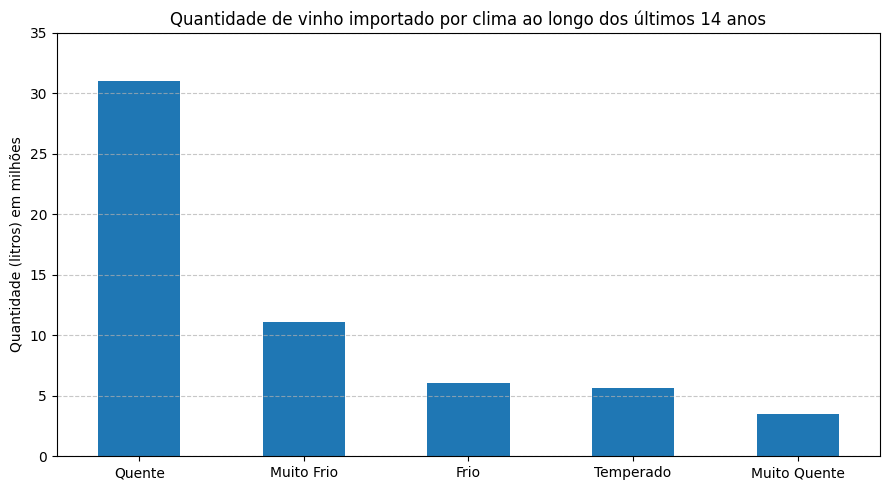

In [492]:
plt.figure(figsize=(9, 5))
(df_total_por_clima['QUANTIDADE'] / 1_000_000).plot(kind='bar')

plt.title('Quantidade de vinho importado por clima ao longo dos últimos 14 anos')
plt.xlabel(None)
plt.ylabel('Quantidade (litros) em milhões')
plt.xticks(rotation=360)
plt.grid(linestyle='--', alpha=0.7)
plt.grid(False, axis='x')
plt.ylim(0, 35)
plt.tight_layout()
plt.show()

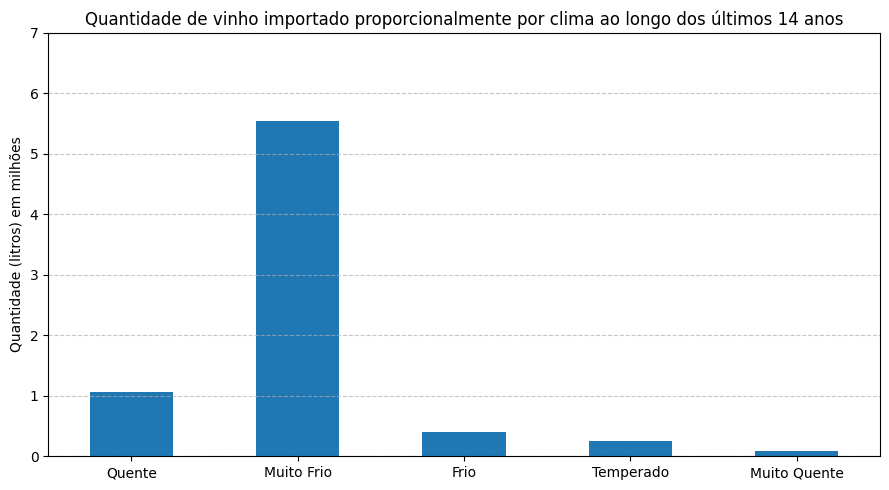

In [493]:
plt.figure(figsize=(9, 5))
(df_total_por_clima['PROPORCAO_POR_CLIMA'] / 1_000_000).plot(kind='bar')

plt.title('Quantidade de vinho importado proporcionalmente por clima ao longo dos últimos 14 anos')
plt.xlabel(None)
plt.ylabel('Quantidade (litros) em milhões')
plt.xticks(rotation=360)
plt.grid(linestyle='--', alpha=0.7)
plt.grid(False, axis='x')
plt.ylim(0, 7)
plt.tight_layout()
plt.show()


## 6. Comparativo por Continente/Região

In [494]:
volume_por_continentes_em_milhoes = df_vinhos.groupby('CONTINENTE')['QUANTIDADE'].sum().sort_values() / 1_000_000

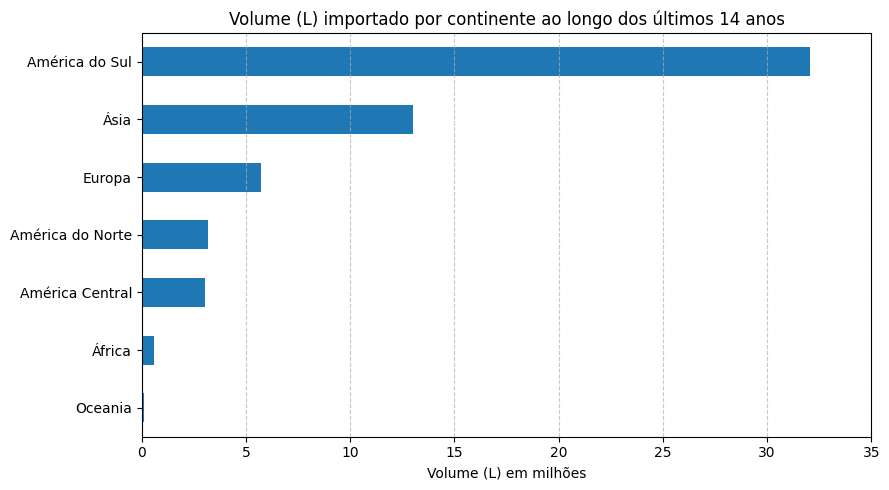

In [495]:
plt.figure(figsize=(9, 5))
volume_por_continentes_em_milhoes.plot(kind='barh')

plt.title('Volume (L) importado por continente ao longo dos últimos 14 anos')
plt.xlabel('Volume (L) em milhões')
plt.ylabel(None)
plt.grid(linestyle='--', alpha=0.7)
plt.grid(False, axis='y')
plt.xlim(0, 35)
plt.tight_layout()
plt.show()

In [496]:
pais_continente_maiores_importadores = df_merged[['PAIS', 'CONTINENTE']][df_merged['PAIS'].isin(maiores_importadores.index)].drop_duplicates()
for continente in pais_continente_maiores_importadores['CONTINENTE'].unique():
    print(f'{len(pais_continente_maiores_importadores['CONTINENTE'][pais_continente_maiores_importadores['CONTINENTE'] == continente])} dos maiores importadores está(ão) no(a) {continente}')

7 dos maiores importadores está(ão) no(a) Europa
4 dos maiores importadores está(ão) no(a) América do Sul
3 dos maiores importadores está(ão) no(a) Ásia
1 dos maiores importadores está(ão) no(a) América do Norte
3 dos maiores importadores está(ão) no(a) América Central


In [497]:
maiores_importadores_europa = df_merged[(df_merged['PAIS'].isin(maiores_importadores.index)) & (df_merged['CONTINENTE'] == 'Europa')]

In [498]:
volume_importado_maiores_importadores_europa = maiores_importadores_europa.groupby('PAIS')['QUANTIDADE'].sum().sort_values() / 1_000_000

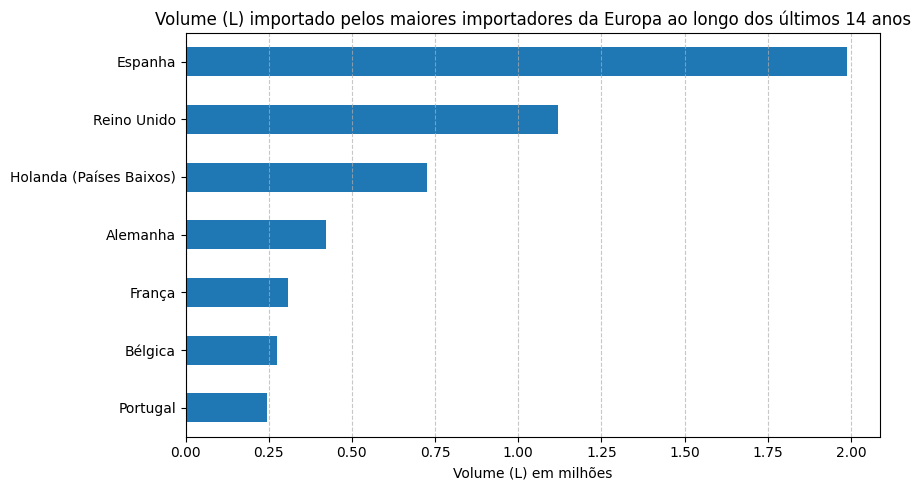

In [499]:
plt.figure(figsize=(9, 5))
volume_importado_maiores_importadores_europa.plot(kind='barh')

plt.title('Volume (L) importado pelos maiores importadores da Europa ao longo dos últimos 14 anos')
plt.xlabel('Volume (L) em milhões')
plt.ylabel(None)
plt.grid(linestyle='--', alpha=0.7)
plt.grid(False, axis='y')
plt.tight_layout()
plt.show()